In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from collections import Counter

In [12]:
approve = pd.read_csv('/content/data.csv')
approve

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [13]:
approve.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [ ]:
approve.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [14]:
approve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
approve.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [ ]:
approve.shape

(9578, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


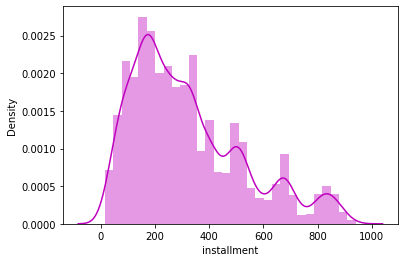

In [16]:
sns.distplot(approve['installment'], kde=True, bins=30, color='m')

In [17]:
df_corr = approve.corr()
df_corr

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


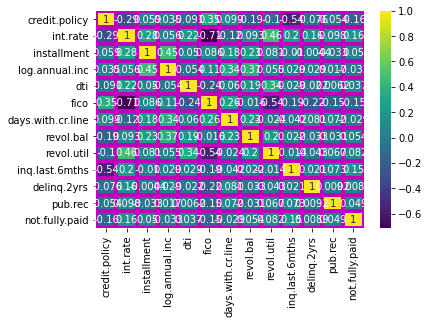

In [ ]:
sns.heatmap(df_corr, cmap='viridis', linecolor='m', linewidths=3, annot=True)

In [ ]:
approve.nlargest(5,'credit.policy')

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
approve.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [ ]:
approve["credit.policy"].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [ ]:
sns.pairplot(approve)

Output hidden; open in https://colab.research.google.com to view.

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
from sklearn.model_selection import train_test_split



In [22]:
X = approve[['credit.policy',	'int.rate','installment','log.annual.inc','dti',	'fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec']]
y = approve['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
lm.fit (X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
lm.score(X_train,y_train)

0.8387529832935561

In [ ]:
lm.coef_

array([[-1.61637721e-02,  1.00872527e-03,  6.93456567e-04,
         3.17212420e-03,  2.53490274e-02, -3.50643733e-03,
        -3.82410464e-05,  2.46518945e-06,  3.41606365e-03,
         1.09310154e-01,  6.42448634e-04,  4.07610142e-03]])

In [ ]:
lm.intercept_

array([0.00149575])

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import  confusion_matrix


In [25]:
lm = LogisticRegression()


In [27]:
X = approve[['credit.policy',	'int.rate','installment','log.annual.inc','dti',	'fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec']]
y = approve['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lm.fit (X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = lm.predict(X_test)

In [29]:
print(confusion_matrix(y_test,y_pred))


[[2410    8]
 [ 452    4]]


In [30]:
print(accuracy_score(y_test,y_pred))

0.8399443284620738


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2418
           1       0.33      0.01      0.02       456

    accuracy                           0.84      2874
   macro avg       0.59      0.50      0.46      2874
weighted avg       0.76      0.84      0.77      2874



In [37]:
approve["not.fully.paid"].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [39]:
numofzero  = 100 * (approve['not.fully.paid'].value_counts()[0]/len(approve))
numofone  = 100 * (approve['not.fully.paid'].value_counts()[1]/len(approve))

print(f' The percentage of zero = {numofzero}')
print(f' The percentage of one = {numofone}')

 The percentage of zero = 83.99457089162664
 The percentage of one = 16.005429108373356


In [40]:
approve[approve['not.fully.paid'] == 1]


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
57,1,credit_card,0.1343,678.08,11.884489,10.15,682,4209.958333,41674,74.1,0,0,0,1
65,1,all_other,0.1059,32.55,10.433822,14.47,687,1110.000000,4485,36.9,1,0,0,1
73,1,small_business,0.1501,225.37,12.269047,6.45,677,6240.000000,56411,75.3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [41]:
#undersampling
datacopy =approve
no_frauds = len(datacopy[datacopy['not.fully.paid'] == 1])
non_fraud_indices = datacopy[datacopy["not.fully.paid"] == 0].index
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
fraud_indices = datacopy[datacopy["not.fully.paid"] == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = datacopy.loc[under_sample_indices]
# X_under = under_sample.drop('not.fully.paid',axis = 1)
# y_under = under_sample['not.fully.paid']
print(len(under_sample[under_sample['not.fully.paid'] == 1]))
print(len(under_sample[under_sample['not.fully.paid'] == 0]))

1533
1533


In [42]:

from imblearn.over_sampling import RandomOverSampler

In [65]:
mydata = approve
ros = RandomOverSampler(sampling_strategy=1)
X = mydata.drop('not.fully.paid',axis =1)
y = mydata['not.fully.paid']

x_ros , y_ros = ros.fit_resample(X,y)

targetdata = pd.DataFrame(y_ros,columns=['not.fully.paid'])
x_ros = pd.DataFrame(x_ros,columns=X.columns)

finaldata = pd.concat([x_ros,targetdata],axis=1)

# print(len(finaldata))
# print(len(x_ros))
len(finaldata)
Counter(finaldata['not.fully.paid'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 8045, 1: 8045})

In [68]:

typeofsampling = int(input('type'))
if typeofsampling == 0:
    data_aftersampling = approve
elif typeofsampling == 1:
    data_aftersampling = under_sample
elif typeofsampling == 2:
    data_aftersampling = finaldata

type2


In [69]:

data_lab = data_aftersampling['not.fully.paid']
data_lab

0        0
1        0
2        0
3        0
4        0
        ..
16085    1
16086    1
16087    1
16088    1
16089    1
Name: not.fully.paid, Length: 16090, dtype: int64

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn import under_sampling , over_sampling
from sklearn.model_selection import train_test_split

In [71]:
data_num = data_aftersampling.drop(['purpose','not.fully.paid'],axis=1)

In [72]:

data_cat = data_aftersampling[['purpose']]
data_cat.head(10)

,purpose
0,debt_consolidation
1,credit_card
2,debt_consolidation
3,debt_consolidation
4,credit_card
5,credit_card
6,debt_consolidation
7,all_other
8,home_improvement
9,debt_consolidation


In [73]:

cat_encoder = OneHotEncoder()
data_cat_hot = cat_encoder.fit_transform(data_cat)
data_cat_hot

<16090x7 sparse matrix of type '<class 'numpy.float64'>'
	with 16090 stored elements in Compressed Sparse Row format>

In [74]:
data_cat_hot.toarray()


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [76]:
num_pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])
data_num_tr = num_pipeline.fit_transform(data_num)

In [77]:

num_attrs = list(data_num)
cat_attrs = ['purpose']

fullpipeline = ColumnTransformer([
    ('num',num_pipeline,num_attrs),
    ('cat',OneHotEncoder(),cat_attrs)
])

data_prepared = fullpipeline.fit_transform(data_aftersampling)

In [78]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import SGDClassifier
X_train, X_test, y_train, y_test = train_test_split(data_prepared,data_lab,test_size = 0.2, random_state = 0)


lin = RandomForestClassifier()
lin.fit(X_train,y_train)
y_pred =lin.predict(X_test)

len(y_test)

3218

In [80]:
some_data = approve.iloc[:10]
some_data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [81]:
some_labels = data_lab.iloc[:10]
some_labels

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    0
9    0
Name: not.fully.paid, dtype: int64

In [82]:

some_data_prepered = fullpipeline.transform(some_data)
some_data_prepered

array([[ 0.58658463, -0.28749051,  2.34432292,  0.70168703,  0.95701678,
         0.85584767,  0.47102963,  0.27731265,  0.10299906, -0.75199573,
        -0.31111682, -0.27317851,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.58658463, -0.72801842, -0.46597695,  0.2773325 ,  0.20808856,
         0.04388661, -0.69925958,  0.40209484,  0.94767714, -0.75199573,
        -0.31111682, -0.27317851,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.58658463,  0.33970177,  0.18243867, -0.84365066, -0.17575519,
        -0.63274762,  0.0931352 , -0.38579388, -0.80691838, -0.35302414,
        -0.31111682, -0.27317851,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.58658463, -0.96321553, -0.77409596,  0.70168703, -0.68514182,
         0.17921345, -0.72365789,  0.40324611,  0.82749937, -0.35302414,
        -0.311

In [83]:
print("prediction" , lin.predict(some_data_prepered))
print("Some Lables" , list(some_labels))

from sklearn.model_selection import cross_val_predict

aaaa = cross_val_predict(lin , X_train , y_train , cv=3)

prediction [0 0 0 0 0 0 1 1 0 0]
Some Lables [0, 0, 0, 0, 0, 0, 1, 1, 0, 0]


In [84]:
confusion_matrix(y_train,aaaa)

array([[5863,  574],
       [ 336, 6099]])

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1608
           1       0.97      0.99      0.98      1610

    accuracy                           0.98      3218
   macro avg       0.98      0.98      0.98      3218
weighted avg       0.98      0.98      0.98      3218

